**Transfer Learning**


---



In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
image_size = 784
num_epochs = 15
batch_size = 128
learning_rate = 1e-2

# image transform
transform1 = transforms.Compose([transforms.Resize(64),
                                 transforms.Grayscale(3), #return 3 channels 
                                 transforms.ToTensor()])

# download train dataset
train_dataset = torchvision.datasets.MNIST(root='./mnist_data/',
                                           train=True,
                                           transform=transform1,
                                           download=True)

# download test dataset
test_dataset = torchvision.datasets.MNIST(root='./mnist_data/',
                                           train=False,
                                           transform=transform1,
                                           download=True)

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader =  torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)



Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist_data/
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=64, interpolation=bilinear, max_size=None, antialias=None)
               Grayscale(num_output_channels=3)
               ToTensor()
           )
torch.Size([3, 64, 64])
5


Text(0.5, 1.0, '9')

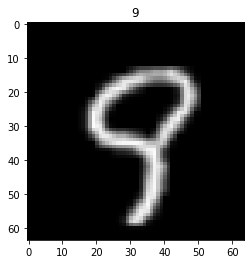

In [19]:
# Check out images in the dataset
print(train_dataset)
#print(train_dataset[0]) # is a tuple of (data,target)
print(train_dataset[0][0].shape)  # image (a tensor)
print(train_dataset[0][1])        # label (an integer)


#print(train_dataset.data.shape)   # all images in the dataset

# Look at a sample
idx = 0
image0 = train_dataset.data[idx]
label0 = train_dataset.targets[idx]

# The above image0 is of size [28,28], not yet transformed
# Dataloader will do the transform and output it in batches
image, label = next(iter(train_loader))
# The image is of size [128,3,64,64]

# To display a single image
image1 = image[0].squeeze()     # get the 0th image in batch
image1 = image1.permute(1,2,0)  # channel goes to the end
image1 = image1.numpy()         # from tensor to numpy
label1 = label[0].item()

plt.imshow(image1)
plt.title(label1)


Download a model 

In [21]:
model1 = torchvision.models.vgg19(pretrained=True).to(device)
print(model1)

!pip install torchinfo
from torchinfo import summary
summary(model1, (1, 3, 32,32), col_names=["kernel_size", "output_size", "num_params"])



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

Layer (type:depth-idx)                   Kernel Shape              Output Shape              Param #
VGG                                      --                        [1, 1000]                 --
├─Sequential: 1-1                        --                        [1, 512, 1, 1]            --
│    └─Conv2d: 2-1                       [3, 3]                    [1, 64, 32, 32]           1,792
│    └─ReLU: 2-2                         --                        [1, 64, 32, 32]           --
│    └─Conv2d: 2-3                       [3, 3]                    [1, 64, 32, 32]           36,928
│    └─ReLU: 2-4                         --                        [1, 64, 32, 32]           --
│    └─MaxPool2d: 2-5                    2                         [1, 64, 16, 16]           --
│    └─Conv2d: 2-6                       [3, 3]                    [1, 128, 16, 16]          73,856
│    └─ReLU: 2-7                         --                        [1, 128, 16, 16]          --
│    └─Conv2d: 2-8      

In [22]:
# You can access the modules/layers inside model
#print(model1)
#print(model1.features)
#print(model1.avgpool)
print(model1.classifier)
print(model1.classifier[0])
print(model1.classifier.parameters)


Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)
Linear(in_features=25088, out_features=4096, bias=True)
<bound method Module.parameters of Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)>


In [23]:
# Get another copy of the model and play with it
model2 = torchvision.models.vgg19(pretrained=True).to(device)

# Freeze the parameters in the features part
for param in model2.features.parameters():
  param.requires_grad = False

# Create an identity network; you can replace a part of the network
#class identity_block(torch.nn.Module):
#  def __init__(self):
#    super().__init__()
#  def forward(self,x):
#    return x
# For example, 
#model2.avgpool = identity_block()
# OR
#model2.avgpool = torch.nn.Identity()

# Replace the last layer of the classifier to have 5 out_features
#model2.classifier[6] = nn.Linear(in_features=4096,out_features=5)
#print(model2)

# Create a new classifier block
class new_block(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=25088, out_features=100)
    self.relu = nn.ReLU()
    self.dropout1 = nn.Dropout()
    self.linear2 = nn.Linear(in_features=100,out_features=5)
  
  def forward(self,x):
    x = self.linear1(x)
    x = self.relu(x)
    x = self.dropout1(x)
    x = self.linear2(x)
    # x = self.dropout1(x) # Adding this would not change print(model) but
    #   the forward process would change
    #   Note that when you print(model), it does not show flattening...
    return x

# Replace the existing block
model2.classifier = new_block()
# OR 
'''
model2.classifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=100),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(in_features=100,out_features=5))
'''

print(model2)

# Access a specific layer
#print(model2.classifier.linear1)
# OR
#print(model2.classifier[0])

 

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [25]:
# Take part of a model
#   Create a list and unpack it (with *) for nn.Sequential
model_part = nn.Sequential(*[model2.features[i] for i in range(31)])
print(model_part)

# Check out the weights; they should be equal
for param in model2.features[0].parameters():
  print(param.data[0])
  print(param.requires_grad)
  

for param in model_part[0].parameters():
  print(param.data[0])
  print(param.requires_grad)
  

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [26]:
# Now, pass a random input, check out the dimension of the model_part
#image, label = next(iter(train_loader))
image = torch.randn((1,3,64,64)).to(device)
y = model_part(image)
print(y.shape)
#>> torch.Size([1, 512, 4, 4])

# Using shape info, you can create a new block and append to model_part
model_part2 = nn.Sequential(
    nn.Flatten(),   
    # The above is part of nn.module. Compare with nn.flatten()
    # ... If a class is written, in .forward, you can write x.view(-1,512*4*4)
    # For vgg19, print(model) doesn't display .forward but the defined layers
    nn.Linear(in_features=512*4*4, out_features=100),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(in_features=100,out_features=10))

#print(model_part2)

# Append these blocks
model3 = nn.Sequential(model_part,model_part2).to(device)
print(model3)
#print(model3[0][0])

y2 = model3(image)
print(y2.shape)


torch.Size([1, 512, 4, 4])
Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=

In [ ]:
# Let's train
loss_function = torch.nn.CrossEntropyLoss()     
optimizer = torch.optim.SGD(model3.parameters(),lr=0.001)

num_epochs = 100


# Define a function to train the model for one epoch
def train_model(train_loader):
  
  # Put model in train mode
  model3.train()

  # For loss calculation
  total_loss = 0
  total_correct = 0
  dataset_size = len(train_loader.dataset)

  # Go over each batch
  for X, y in train_loader:
    X = X.to(device)
    y = y.to(device)

    y_pred = model3(X)

    loss = loss_function(y_pred,y)  
    # In the above
    #   input:y_pred is logits, target y is integer index.
    #   target could also be a vector of probabilities
    #     in that case, y.softmax(1) could be used to convert to probabilities  
    
    # Zero the gradients, backpropagate the gradients, update the parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate loss
    total_loss += loss_function(y_pred, y).item()
    total_correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()

  print(f"Training Loss:{total_loss/dataset_size:0.4f}, \
          Training Accuracy:{total_correct/dataset_size:0.4f}")


# Define a function to test the model
def test_model(test_loader):
  # Put the model into evaluation mode
  model3.eval()

  # For loss calculation
  total_loss = 0
  total_correct = 0
  dataset_size = len(test_loader.dataset)

  # Do not calculate gradients
  with torch.no_grad():
    for X,y in test_loader:
      X = X.to(device)
      y = y.to(device)

      y_pred = model3(X)

      # Calculate loss
      total_loss += loss_function(y_pred, y).item()
      total_correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()
  
  print(f"Test Loss: {total_loss/dataset_size:0.4f}, \
          Test Accuracy: {total_correct/dataset_size:0.4f}")


for epoch in range(num_epochs):
  print('Epoch:',epoch)
  # Train loss
  train_model(train_loader)

  # Test loss
  test_model(test_loader)